In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patches import Circle
from scipy.signal import find_peaks
from matplotlib.patches import RegularPolygon

In [2]:
# jet, plasma, inferno, magma

def mssf_map(intens, qxmin, qxmax, qymin, qymax, title=None, zlim=None, ax=None, **kwargs):
    
    kwargs.setdefault('cmap', 'inferno')
    kwargs.setdefault('origin', 'lower')
    kwargs.setdefault('interpolation', 'spline16')
    
    
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    
    if title:
        ax.set_title(title)
    
    if zlim:
        kwargs['vmin'], kwargs['vmax'] = zlim
        norm = None
    else:
        norm = Normalize(vmin=intens.min(), vmax=intens.max())
    
    im = ax.imshow(intens, extent=[qxmin, qxmax, qymin, qymax], norm=norm, **kwargs)
    ax.set_xlabel('$q_x (r.l.u)$', fontsize=20)
    ax.set_ylabel('$q_y (r.l.u)$', fontsize=20)
    
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.05)
    
#     plt.colorbar(im, cax=cax)
    return ax

In [49]:
def plot_circle(ax, idx, y_index, x, INTENS, height, cor):
    
    peaks, _ = find_peaks(INTENS[y_index,:], height=height)
    
    circ1 = Circle((x[peaks[idx]], 0.), 0.3, lw=3, color=cor, fill=False)
#     circ2 = Circle((x[peaks[3]], 0.), 0.4, lw=3, color='k', fill=False)
    ax[0].add_patch(circ1)
#     ax[0].add_patch(circ2)
    
    circ3 = Circle((x[peaks[idx]], INTENS[y_index,peaks[idx]]), 0.1, lw=3, color=cor, fill=False, alpha=0.5)
#     circ4 = Circle((x[peaks[3]], INTENS[y_index,peaks[3]]), 0.1, lw=3, color='k', fill=False, alpha=0.5)
    ax[1].add_patch(circ3)
#     ax[1].add_patch(circ4)
    
def personaliza(ax):
    font_dict1 = {'fontsize': 20, 
             'verticalalignment':'top'}
    
    ax[0].set_xticks([-2 , -1, 0, 1, 2])
    ax[0].set_xticklabels(['-2', '-1', '0', '1', '2'], fontdict=font_dict1)
    ax[0].set_yticks([-2 , -1, 0, 1, 2])
    ax[0].set_yticklabels(['-2', '-1', '0', '1', '2'], fontdict=font_dict1)
    ax[0].tick_params(axis='x', length=5, width=3)
    ax[0].tick_params(axis='y', length=5, width=3)

    font_dict2 = {'fontsize': 15, 
                 'verticalalignment':'top'}

    ax[1].set_xticks([1, 2])
    ax[1].set_xticklabels(['1', '2'], fontdict=font_dict2)
#     ax[1].set_yticks([0, 1])
#     ax[1].set_yticklabels([0, 1], fontdict=font_dict2)
    ax[1].tick_params(axis='x', length=5, width=2)
    ax[1].tick_params(axis='y', length=5, width=2)
    
    ax[1].set_ylabel('Intensity (a.u.)', fontsize=20)

In [70]:
data = pd.read_csv('output1.dat', sep='\s+')

qx = data['qx'].to_numpy()
qy = data['qy'].to_numpy()
Intens = data['Intens'].to_numpy()

n = int(np.sqrt(qx.size))
# Qx, Qy = np.meshgrid(qx, qy)
INTENS = Intens.reshape(n, n)/Intens.max()


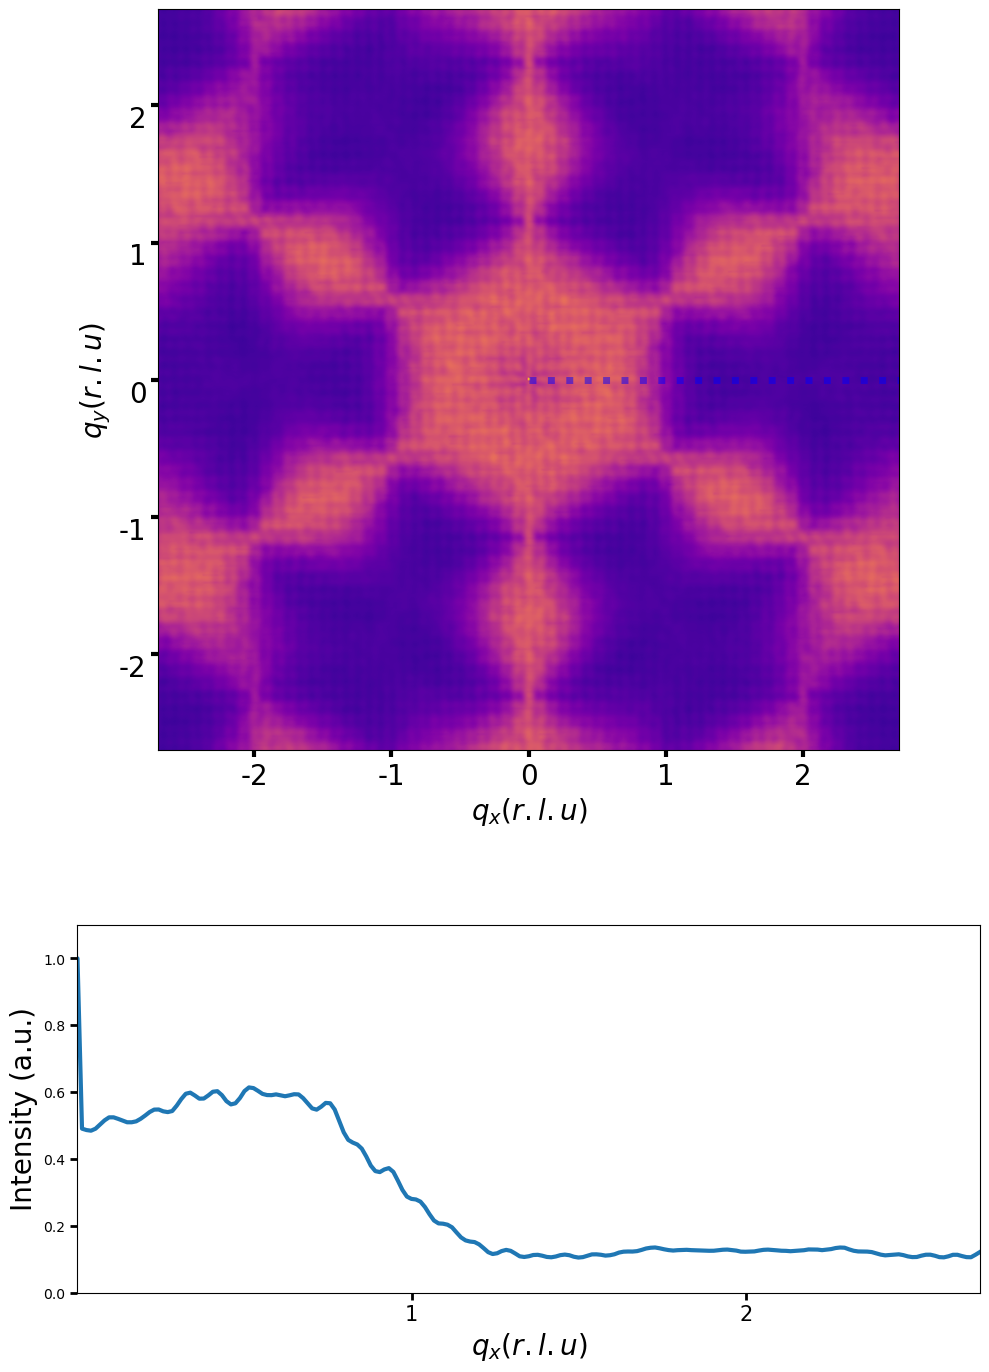

In [72]:
kwargs = {
    'cmap': 'plasma',
    'zlim': (0, 1)
}

fig, ax = plt.subplots(2, 1, figsize=(10, 15))

qxmin = qx.min()/np.pi
qxmax = qx.max()/np.pi
qymin = qy.min()/np.pi
qymax = qy.max()/np.pi
y_value = 0
y_index = int((y_value - qy.min()) / (qy.max() - qy.min()) * INTENS.shape[0])

# x_value = 0
# x_index = int((x_value - qx.min()) / (qx.max() - qx.min()) * INTENS.shape[0])

x = np.linspace(qxmin, qxmax, n)

mssf_map(INTENS, qxmin, qxmax, qymin, qymax, title=None, ax=ax[0], **kwargs)

ax[1].plot(x, INTENS[y_index,:], lw=3)
ax[1].set_xlabel('$q_x (r.l.u)$', fontsize=20)

ax[1].set_xlim(0, qxmax)
ax[1].set_ylim(0, 1.1)
ax[1].set_aspect('equal')

# plot_circle(ax, y_index, x, INTENS, 0.2)
personaliza(ax)
ax[0].axhline(y_value, xmin=0.5, xmax=1, color='b', lw=5, linestyle=':', alpha=0.5)
# ax[0].axvline(x_value, ymin=0.5, ymax=1, color='orange', lw=5, linestyle=':', alpha=0.5)

fig.tight_layout()

fig.patch.set_facecolor('w')
plt.savefig('001.png', bbox_inches='tight', dpi=150)

# r.l.u -> relative lattice units

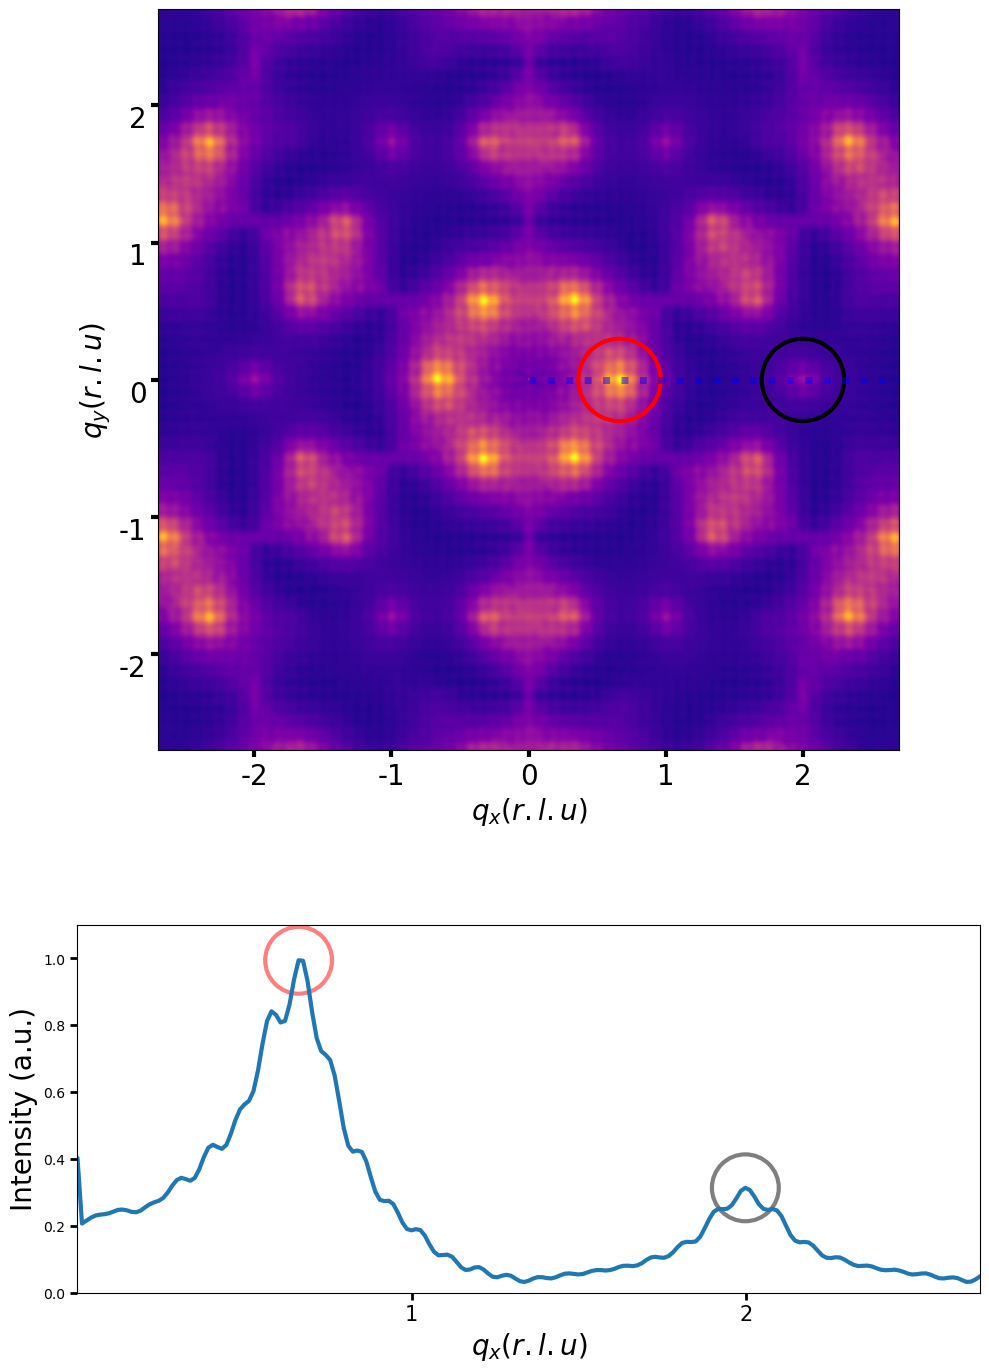

In [73]:
data = pd.read_csv('output2.dat', sep='\s+')

qx = data['qx'].to_numpy()
qy = data['qy'].to_numpy()
Intens = data['Intens'].to_numpy()

n = int(np.sqrt(qx.size))
# Qx, Qy = np.meshgrid(qx, qy)
INTENS = Intens.reshape(n, n)/Intens.max()

kwargs = {
    'cmap': 'plasma',
    'zlim': (0, 1)
}

fig, ax = plt.subplots(2, 1, figsize=(10, 15))

qxmin = qx.min()/np.pi
qxmax = qx.max()/np.pi
qymin = qy.min()/np.pi
qymax = qy.max()/np.pi
y_value = 0
y_index = int((y_value - qy.min()) / (qy.max() - qy.min()) * INTENS.shape[0])
x = np.linspace(qxmin, qxmax, n)

mssf_map(INTENS, qxmin, qxmax, qymin, qymax, title=None, ax=ax[0], **kwargs)

ax[1].plot(x, INTENS[y_index,:], lw=3)
ax[1].set_xlabel('$q_x (r.l.u)$', fontsize=20)

ax[1].set_xlim(0, qxmax)
ax[1].set_ylim(0, 1.1)
ax[1].set_aspect('equal')

plot_circle(ax, 1, y_index, x, INTENS, 0.9, cor='r')
plot_circle(ax,-1, y_index, x, INTENS, 0.3, cor='k')

personaliza(ax)
ax[0].axhline(y_value, xmin=0.5, xmax=1, color='b', lw=5, linestyle=':', alpha=0.5)

fig.tight_layout()

fig.patch.set_facecolor('w')
plt.savefig('002.png', bbox_inches='tight', dpi=150)

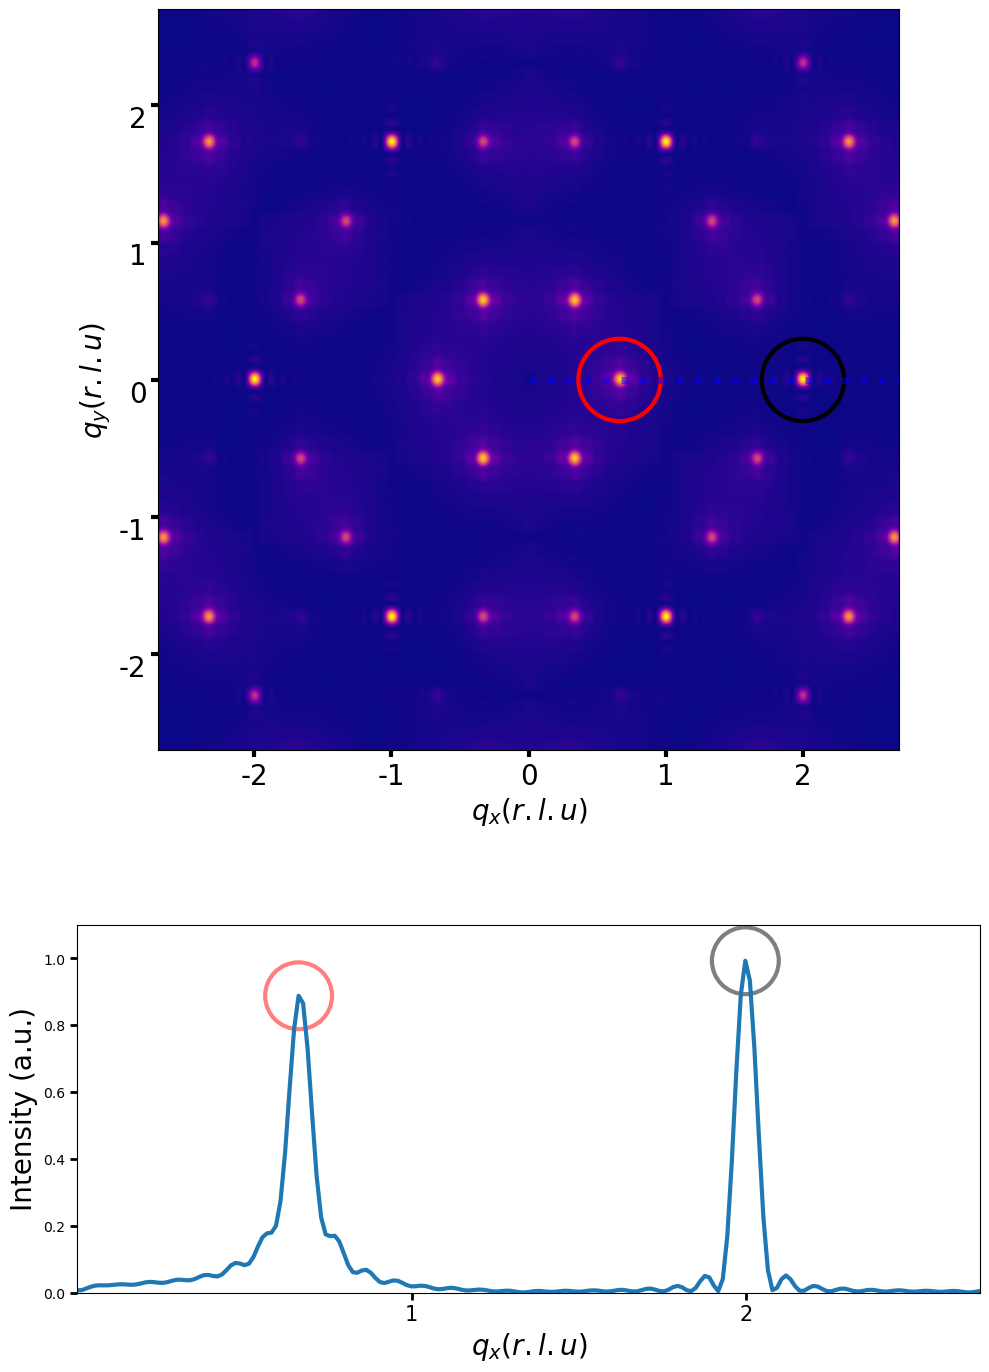

In [74]:
data = pd.read_csv('output3.dat', sep='\s+')

qx = data['qx'].to_numpy()
qy = data['qy'].to_numpy()
Intens = data['Intens'].to_numpy()

n = int(np.sqrt(qx.size))
# Qx, Qy = np.meshgrid(qx, qy)
INTENS = Intens.reshape(n, n)/Intens.max()

kwargs = {
    'cmap': 'plasma',
    'zlim': (0, 1)
}

fig, ax = plt.subplots(2, 1, figsize=(10, 15))

qxmin = qx.min()/np.pi
qxmax = qx.max()/np.pi
qymin = qy.min()/np.pi
qymax = qy.max()/np.pi
y_value = 0
y_index = int((y_value - qy.min()) / (qy.max() - qy.min()) * INTENS.shape[0])
x = np.linspace(qxmin, qxmax, n)

mssf_map(INTENS, qxmin, qxmax, qymin, qymax, title=None, ax=ax[0], **kwargs)

ax[1].plot(x, INTENS[y_index,:], lw=3)
ax[1].set_xlabel('$q_x (r.l.u)$', fontsize=20)

ax[1].set_xlim(0, qxmax)
ax[1].set_ylim(0, 1.1)
ax[1].set_aspect('equal')

plot_circle(ax, 2, y_index, x, INTENS, 0.7, cor='r')
plot_circle(ax,-1, y_index, x, INTENS, 0.3, cor='k')
personaliza(ax)
ax[0].axhline(y_value, xmin=0.5, xmax=1, color='b', lw=5, linestyle=':', alpha=0.5)

fig.tight_layout()

fig.patch.set_facecolor('w')
plt.savefig('003.png', bbox_inches='tight', dpi=150)

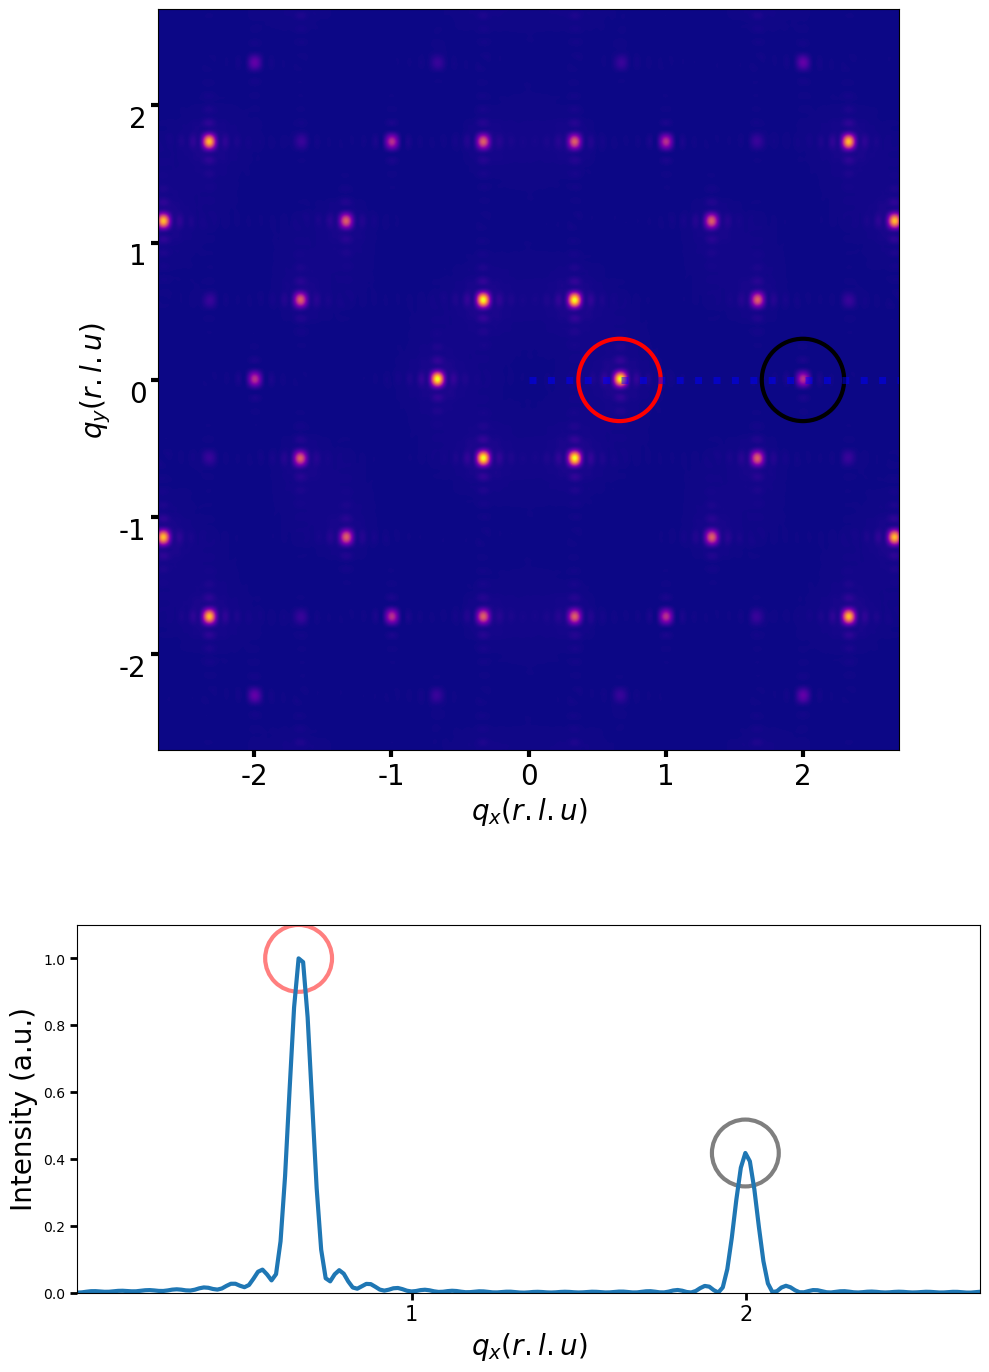

In [75]:
data = pd.read_csv('output4.dat', sep='\s+')

qx = data['qx'].to_numpy()
qy = data['qy'].to_numpy()
Intens = data['Intens'].to_numpy()

n = int(np.sqrt(qx.size))
# Qx, Qy = np.meshgrid(qx, qy)
INTENS = Intens.reshape(n, n)/Intens.max()

kwargs = {
    'cmap': 'plasma',
    'zlim': (0, 1)
}

fig, ax = plt.subplots(2, 1, figsize=(10, 15))

qxmin = qx.min()/np.pi
qxmax = qx.max()/np.pi
qymin = qy.min()/np.pi
qymax = qy.max()/np.pi
y_value = 0
y_index = int((y_value - qy.min()) / (qy.max() - qy.min()) * INTENS.shape[0])
x = np.linspace(qxmin, qxmax, n)

mssf_map(INTENS, qxmin, qxmax, qymin, qymax, title=None, ax=ax[0], **kwargs)

ax[1].plot(x, INTENS[y_index,:], lw=3)
ax[1].set_xlabel('$q_x (r.l.u)$', fontsize=20)

ax[1].set_xlim(0, qxmax)
ax[1].set_ylim(0, 1.1)
ax[1].set_aspect('equal')

plot_circle(ax, 1, y_index, x, INTENS, 0.9, cor='r')
plot_circle(ax,-1, y_index, x, INTENS, 0.3, cor='k')
personaliza(ax)
ax[0].axhline(y_value, xmin=0.5, xmax=1, color='b', lw=5, linestyle=':', alpha=0.5)

fig.tight_layout()

fig.patch.set_facecolor('w')
plt.savefig('004.png', bbox_inches='tight', dpi=150)